# 01 Exploratory Data & Problem Definition

Placeholder notebook for initial data exploration, domain framing, and problem definition. No modeling code included yet.

# Volatility Forecasting and Risk Modeling

This notebook defines the volatility forecasting problem and explores the statistical
properties of market volatility.

Goal:
- Forecast future realized volatility using historical price data
- Compare classical volatility models with machine learning approaches

The focus is on robust time-series methodology rather than return prediction.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [45]:
ticker = "SPY"
start_date = "2010-01-01"
end_date = "2026-01-01"

vol_window = 20   # realized vol look back (~1 month)
horizon = 5       # forecast horizon (~1 week)

df = yf.download(
    ticker,
    start=start_date,
    end=end_date,
    progress=False,
    auto_adjust=True
)

print(df.columns)
df.head()

price_col = "Adj Close" if "Adj Close" in df.columns else "Close"
prices = df[price_col].dropna()

prices.head(), prices.shape
prices = df[price_col].squeeze().dropna().sort_index() # ensure Series type


MultiIndex([( 'Close', 'SPY'),
            (  'High', 'SPY'),
            (   'Low', 'SPY'),
            (  'Open', 'SPY'),
            ('Volume', 'SPY')],
           names=['Price', 'Ticker'])


log returns are additive over time and commonly used in volatility modeling.



In [46]:
log_returns = np.log(prices).diff().dropna()
log_returns.head()

Date
2010-01-05    0.002644
2010-01-06    0.000704
2010-01-07    0.004213
2010-01-08    0.003322
2010-01-11    0.001396
Name: SPY, dtype: float64

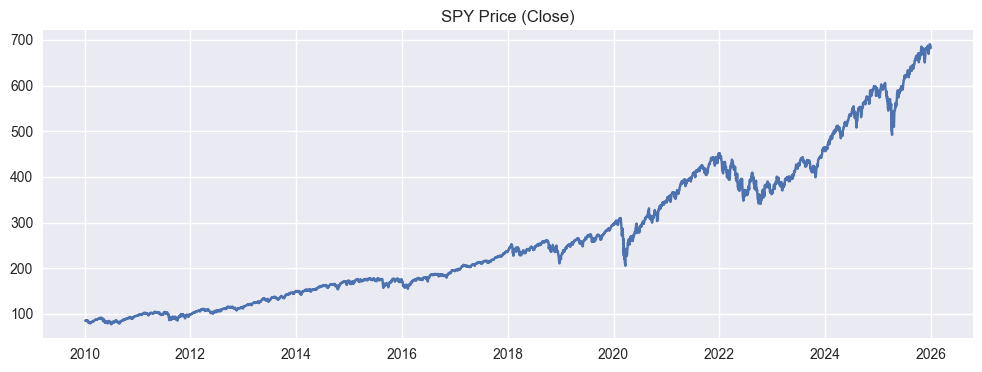

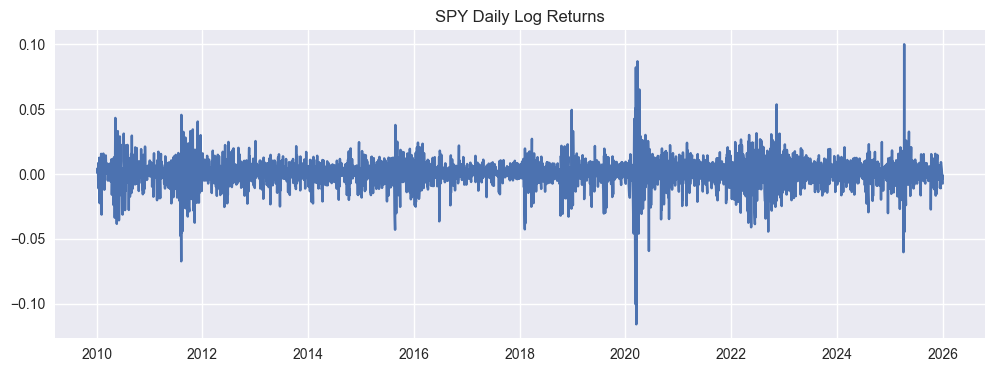

In [47]:
plt.figure(figsize=(12,4))
plt.plot(prices.index, prices.values)
plt.title(f"{ticker} Price ({price_col})")
plt.show()

plt.figure(figsize=(12,4))
plt.plot(log_returns.index, log_returns.values)
plt.title(f"{ticker} Daily Log Returns")
plt.show()


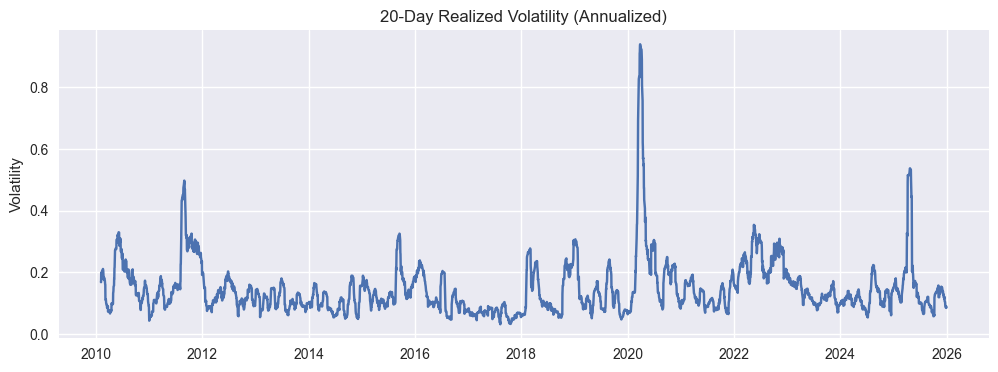

In [48]:
realized_vol = log_returns.rolling(vol_window).std() * np.sqrt(252)
realized_vol = realized_vol.dropna()
realized_vol.head()

plt.figure(figsize=(12,4))
plt.plot(realized_vol.index, realized_vol.values)
plt.title(f"{vol_window}-Day Realized Volatility (Annualized)")
plt.ylabel("Volatility")
plt.show()


## Volatility Persistence Check
The graph should have very little bias and the gradient should be very equal to 1 to show that our assume that the past of the volatility could predict the future in the Horizons that we set

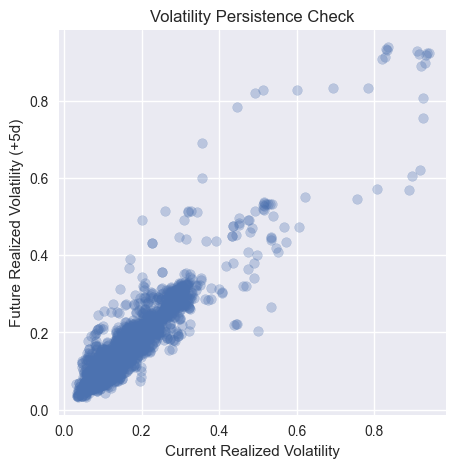

In [49]:
target_vol = realized_vol.shift(-horizon)
data = pd.DataFrame({
    "realized_vol": realized_vol,
    "target_vol": target_vol
}).dropna()

data.head(), data.shape

plt.figure(figsize=(5,5))
plt.scatter(data["realized_vol"], data["target_vol"], alpha=0.3)
plt.xlabel("Current Realized Volatility")
plt.ylabel(f"Future Realized Volatility (+{horizon}d)")
plt.title("Volatility Persistence Check")
plt.show()


In [50]:
data.to_csv("../data_processed/volatility_base.csv")
print("Saved: ../data_processed/volatility_base.csv")


Saved: ../data_processed/volatility_base.csv
